In [87]:
from sklearn import svm
import pandas as pd
import numpy as np
from sklearn import metrics
from matplotlib import pyplot as plt


In [88]:
df = pd.read_csv('genepresenceabsencefiltered.csv', index_col = 0, sep = ';')

/home/lf481323/.conda/envs/torchGeoM/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253

In [89]:
df

,Non-unique Gene name,Annotation,No. isolates,No. sequences,Avg sequences per isolate,Genome Fragment,Order within Fragment,Accessory Fragment,Accessory Order with Fragment,QC,...,61346_KN13_116,61347_05_590_19,61348_08_590_256,61353_IN_09_3875,61354_IN_09_3830,61379_WHO_Z,61380_BEL_10_3,61381_989000041,61382_IC_CNR077,61383_IC_15039
Gene,,,,,,,,,,,,,,,,,,,,,
group_1034,NaN,Type IV pilus assembly protein PilM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cysNC,NaN,Bifunctional enzyme CysN/CysC,414.0,414.0,1.0,1.0,1874.0,52.0,1.0,NaN,...,g61346_00669,g61347_00331,g61348_01910,g61353_00249,g61354_00254,g61379_00338,g61380_00227,g61381_00179,g61382_00291,g61383_00205
group_1277,NaN,Inner membrane protein,414.0,414.0,1.0,1.0,3035.0,15.0,3.0,NaN,...,g61346_00555,g61347_00650,g61348_00939,g61353_00454,g61354_00411,g61379_00419,g61380_00572,g61381_01673,g61382_00550,g61383_00520
group_1352,NaN,hypothetical protein,414.0,414.0,1.0,1.0,2655.0,35.0,2.0,NaN,...,g61346_01119,g61347_01122,g61348_01062,g61353_01108,g61354_01255,g61379_00964,g61380_01286,g61381_00995,g61382_01220,g61383_01079
group_1405,NaN,hypothetical protein,414.0,414.0,1.0,1.0,749.0,147.0,1.0,Hypothetical protein with no hits to refseq/un...,...,g61346_01710,g61347_01675,g61348_01758,g61353_01788,g61354_01744,g61379_01510,g61380_01823,g61381_01605,g61382_01791,g61383_01817
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
group_3844,NaN,hypothetical protein,1.0,1.0,1.0,1.0,2817.0,927.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,g61382_00949,NaN
group_3845,pilE_2,Fimbrial protein,1.0,1.0,1.0,1.0,668.0,2.0,147.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,g61382_01677,NaN
group_3846,pilE_4,Fimbrial protein,1.0,1.0,1.0,1.0,37.0,2.0,519.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,g61382_01763,NaN


In [90]:
cols = [0,1,2,3,4,5,6,7,8,9,10,11,12]
df.columns[cols]

Index(['Non-unique Gene name', 'Annotation', 'No. isolates', 'No. sequences',
       'Avg sequences per isolate', 'Genome Fragment', 'Order within Fragment',
       'Accessory Fragment', 'Accessory Order with Fragment', 'QC',
       'Min group size nuc', 'Max group size nuc', 'Avg group size nuc'],
      dtype='object')

In [91]:
df.drop(df.columns[cols], 1, inplace=True)
gene = df.fillna(0)

/tmp/ipykernel_83919/2079327292.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df.drop(df.columns[cols], 1, inplace=True)


In [92]:
gene = gene.astype(bool).astype(int)
gene = gene.rename(columns=lambda x: x.split('_')[0])

In [93]:
geneT = gene.T.astype(int)
geneT

Gene,group_1034,cysNC,group_1277,group_1352,group_1405,group_1784,group_2013,group_2063,folP,group_340,...,group_3839,group_3840,group_3841,group_3842,group_3843,group_3844,group_3845,group_3846,group_3847,group_3848
2855,0,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
13685,0,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
27228,0,0,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
31457,0,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
31458,0,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61379,0,1,1,1,1,1,1,1,1,1,...,1,1,1,1,0,0,0,0,0,0
61380,0,1,1,1,1,1,1,1,1,1,...,0,0,0,0,1,0,0,0,0,0
61381,0,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
61382,0,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,1,1,1,0,0


In [94]:
lineage = pd.read_csv('lineages.csv',sep='\t', index_col = 0)
lineage = lineage.set_index(geneT.index)
lineage


,lineage
2855,1
13685,1
27228,1
31457,1
31458,1
...,...
61379,0
61380,0
61381,0
61382,0


In [95]:
from sklearn import preprocessing


In [96]:
data = geneT.join(lineage)

In [97]:
#data.to_csv('gene_oneHotEncoding.csv')

In [98]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size = 0.2)
train.head()

,group_1034,cysNC,group_1277,group_1352,group_1405,group_1784,group_2013,group_2063,folP,group_340,...,group_3840,group_3841,group_3842,group_3843,group_3844,group_3845,group_3846,group_3847,group_3848,lineage
31966,0,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
31988,0,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
31791,0,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
31634,0,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,1
31729,0,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,1


In [99]:
X_train = train.iloc[:,:2452].to_numpy()
X_test = test.iloc[:,:2452].to_numpy()

In [100]:
X_train_norm = preprocessing.normalize(X_train, norm='l2')
X_test_norm = preprocessing.normalize(X_test, norm='l2')

In [101]:
y_train = train['lineage'].to_numpy()
y_test = test['lineage'].to_numpy()

In [102]:
linear_svc = svm.SVC(kernel='linear')
linear_svc.fit(X_train_norm, y_train)

SVC(kernel='linear')

In [103]:
y_pred = linear_svc.predict(X_test_norm)

In [104]:
y_test

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1])

In [105]:

metrics.confusion_matrix(y_test, y_pred)

array([[ 8, 21],
       [ 2, 53]])

In [106]:
metrics.accuracy_score(y_test, y_pred)

0.7261904761904762

In [107]:
len(geneT.columns)

2452

In [22]:
def f_importances(coef, names,top=-1):
    imp = coef
    imp,names = zip(*sorted(list(zip(imp,names))))
     # Show all features
    if top == -1:
        top = len(names)
    plt.barh(range(top), imp[::-1][0:top], align='center')
    plt.yticks(range(top),  names[::-1][0:top])
    plt.show()

features_names = geneT.columns



In [23]:
from sklearn.inspection import permutation_importance
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

svc_rbf =  svm.SVC(kernel='rbf', C=2)
svc_rbf.fit(X_train, y_train)

perm_importance = permutation_importance(svc_rbf, X_test, y_test)

features = np.array(features_names)

sorted_idx = perm_importance.importances_mean.argsort()


KeyboardInterrupt: 

Text(0.5, 0, 'Permutation Importance')

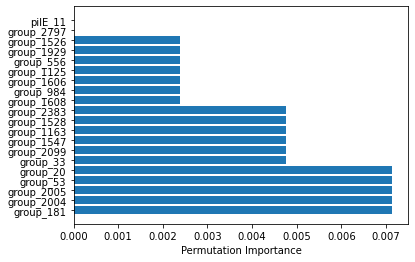

In [28]:
plt.barh(features[sorted_idx][::-1][0:20], perm_importance.importances_mean[sorted_idx][::-1][0:20])
plt.xlabel("Permutation Importance")

In [29]:
perm_importance.importances_mean[sorted_idx][:10]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

# SVM Recursive Feature Elimination

In [30]:
#Preparo il training set
X = data.iloc[:,:-1].to_numpy()
y = data['lineage'].to_numpy()

In [31]:
X_norm = preprocessing.normalize(X, norm='l2')

In [32]:
#algortimo recursive feature elimination basato sui pesi del classificatore svm
def svm_feature_selection_linear(X_0, y_0, f_names):  
    r = []
    s = [*range(0,len(X_0[0])-1,1)]
    X_train = X_0[:,s]
    y_train = y_0
    features = np.array(f_names)
    while (len(s) > 0):
        svc_linear = svm.SVC(kernel='linear')
        svc_linear.fit(X_train, y_train)
        f_importance = abs(svc_linear.coef_[0])
        sorted_idx = f_importance.argsort()
    
        
        r.append(features[sorted_idx[0]])
        X_train = np.delete(X_train,sorted_idx[0],axis = 1)
        features = np.delete(features,sorted_idx[0])       
        s = [*range(0,len(X_train[0])-1,1)]
       
    

    return r

In [33]:
ranked_f = svm_feature_selection_linear(X_norm, y, geneT.columns)

In [34]:
geneRanked_arr = np.array(ranked_f)[::-1]

In [35]:
geneRanked_arr

array(['group_1528', 'group_181', 'group_2414', ..., 'group_3484',
       'group_3444', 'group_1034'], dtype='<U10')

In [36]:
#pd.DataFrame(geneRanked_arr).to_csv("geneRankedSVM_normalized.csv")
#data = pd.read_csv("geneRankedSVM_normalized.csv", index_col = 0)

In [108]:
#prendo le ultime features (le più importanti)
n = 211
ranked_f[-n:]


['group_998',
 'group_2631',
 'group_147',
 'repE_2',
 'group_2418',
 'traC',
 'group_935',
 'group_2507',
 'group_42',
 'group_3608',
 'group_3888',
 'group_228',
 'group_3729',
 'group_1522',
 'group_76',
 'epsE',
 'group_2052',
 'group_192',
 'group_633',
 'group_913',
 'group_132',
 'group_1557',
 'topB',
 'group_1877',
 'group_1537',
 'group_914',
 'pilE_5',
 'group_603',
 'pilE1_5',
 'group_1479',
 'group_2847',
 'group_2467',
 'dsbC_1',
 'pilE_8',
 'nosD_2',
 'group_97',
 'group_1127',
 'mafA1_2',
 'group_1919',
 'leuC',
 'group_15',
 'group_2530',
 'group_243',
 'vapD_1',
 'parA_2',
 'group_1566',
 'group_366',
 'group_1516',
 'group_2464',
 'lagD_2',
 'group_751',
 'group_545',
 'group_1514',
 'group_1011',
 'group_3059',
 'group_3062',
 'group_1945',
 'group_224',
 'group_477',
 'group_43',
 'piiC_1',
 'group_1644',
 'group_2516',
 'group_1611',
 'group_410',
 'pilE1_4',
 'group_1683',
 'group_1187',
 'topB_2',
 'group_2593',
 'group_987',
 'group_112',
 'group_1488',
 'group

In [113]:
data[ranked_f[-n:]].T.to_csv("geneRankedSVM_normalized211.csv")

In [110]:
#filtro il dataset sulle features selezionate
data_f = data[ranked_f[-n:]].join(lineage)

In [111]:
trainf, testf = train_test_split(data_f, test_size = 0.2)
X_trainf = trainf.iloc[:,:n-1].to_numpy()
X_trainf_norm = preprocessing.normalize(X_trainf, norm='l2')
X_testf = testf.iloc[:,:n-1].to_numpy()
X_testf_norm = preprocessing.normalize(X_testf, norm='l2')
y_trainf = trainf['lineage'].to_numpy()
y_testf = testf['lineage'].to_numpy()

In [49]:
X_trainf_norm

array([[0.        , 0.18898224, 0.18898224, ..., 0.        , 0.18898224,
        0.        ],
       [0.        , 0.24253563, 0.        , ..., 0.        , 0.24253563,
        0.        ],
       [0.18898224, 0.18898224, 0.        , ..., 0.        , 0.18898224,
        0.18898224],
       ...,
       [0.21320072, 0.21320072, 0.        , ..., 0.        , 0.        ,
        0.21320072],
       [0.        , 0.20412415, 0.        , ..., 0.        , 0.20412415,
        0.20412415],
       [0.        , 0.2       , 0.        , ..., 0.        , 0.        ,
        0.2       ]])

In [66]:
#train con le feature selezionate
linear_svc = svm.SVC(kernel='linear')
linear_svc.fit(X_trainf_norm, y_trainf)

SVC(kernel='linear')

In [67]:
y_predf = linear_svc.predict(X_testf_norm)
metrics.confusion_matrix(y_testf, y_predf)


array([[16,  7],
       [ 4, 57]])

In [68]:
metrics.accuracy_score(y_testf, y_predf)

0.8690476190476191

In [69]:
metrics.precision_score(y_testf, y_predf,average='weighted')

0.865811011904762

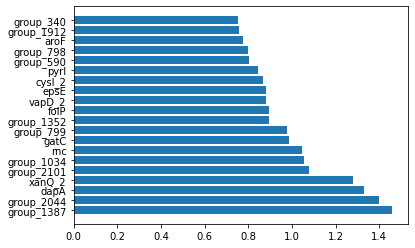

In [70]:
f_importances(abs(linear_svc.coef_[0]), features_names, top=20)

In [80]:
#Cross Validation
from sklearn.model_selection import cross_val_score
Xf = data_f.iloc[:,:-1].to_numpy()
Xfnorm = preprocessing.normalize(Xf, norm='l2')
yf= data_f['lineage'].to_numpy()
scores = cross_val_score(linear_svc, Xf, yf, cv=5)

In [81]:
scores

array([0.82142857, 0.70238095, 0.78571429, 0.79761905, 0.62650602])

In [82]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.75 accuracy with a standard deviation of 0.07


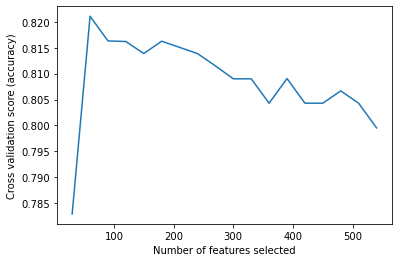

In [58]:
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification
svc = SVC(kernel="linear")
n = [30,60,90,120,150,180,240,270,300,330,360,390,420,450,480,510,540]
grid_scores =np.zeros(len(n))
scores.mean()
for i in range(len(n)):
# Create the RFE object and compute a cross-validated score.
    data_f = data[ranked_f[-n[i]:]].join(lineage)
# The "accuracy" scoring shows the proportion of correct classifications
    Xf = data_f.iloc[:,:-1].to_numpy()
    Xfnorm = preprocessing.normalize(Xf, norm='l2')
    yf= data_f['lineage'].to_numpy()
    cv = KFold(n_splits=10, random_state=1, shuffle=True)
    scores = cross_val_score(linear_svc, Xfnorm, yf, cv=cv).mean()
    grid_scores[i] = scores.mean()
    
# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (accuracy)")
plt.plot(n,grid_scores)
plt.show()

In [59]:
grid_scores

array([0.78292683, 0.82108014, 0.81631823, 0.81620209, 0.81387921,
       0.81626016, 0.81387921, 0.81149826, 0.80900116, 0.80900116,
       0.80429733, 0.80905923, 0.80429733, 0.80429733, 0.80667828,
       0.80429733, 0.79953542])

In [60]:
print("Optimal number of features : %d" % n[grid_scores.argmax()])

Optimal number of features : 60


In [83]:
#Cross Validation Radial Kernel
from sklearn.model_selection import cross_val_score
Xf = data_f.iloc[:,:-1].to_numpy()
Xfnorm = preprocessing.normalize(Xf, norm='l2')
yf= data_f['lineage'].to_numpy()
rbf = svm.SVC(kernel='rbf', gamma = 2)
scores = cross_val_score(rbf, Xfnorm, yf, cv=5)

In [84]:
scores

array([0.77380952, 0.71428571, 0.75      , 0.85714286, 0.65060241])

In [85]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.75 accuracy with a standard deviation of 0.07


In [86]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression

scoreslg = cross_val_score(LogisticRegression(penalty ='l2'), Xfnorm, yf, cv=5)
scoreslg
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.75 accuracy with a standard deviation of 0.07
